In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [154]:
df = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")
df=df.rename(columns = {'Êcommunityname':'Community Name'})
df = df.replace('?', '0')

In [155]:
df.head()

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,0,0,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,0,0,306.64,0
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,0,9988.79


In [156]:
violent_crimes = list(map(float, df.ViolentCrimesPerPop))
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)
violent_crimes_mean

530.3040045146731

In [157]:
df['mean_violent_crimes'] = violent_crimes_mean

In [158]:
df['violent_crime_occurence'] = np.where(violent_crimes>=df['mean_violent_crimes'], '1', '0')

In [159]:
df.groupby('violent_crime_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_violent_crimes
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
0,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,13.781672,...,52.989732,77.301493,88.433861,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,530.304005
1,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,14.344055,...,48.771535,77.620039,87.497874,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,530.304005


In [174]:
df1 = df.iloc[:200]

In [191]:
features = ['householdsize', 'racepctblack']
X = df1[features].values
y = df1['violent_crime_occurence'].astype(float).values

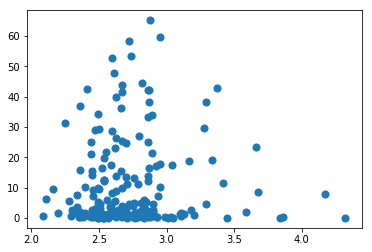

In [192]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [194]:
y_train.dtype

dtype('float64')

In [195]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

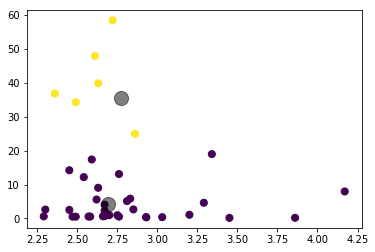

In [196]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [199]:
#Clustering opposite to original

kmeans_accuracy = 1 - (accuracy_score(y_test, y_pred))
kmeans_precison=precision_score(y_test,y_pred,average=None)
kmeans_recall=recall_score(y_test,y_pred,average=None)
kmeans_f1=f1_score(y_test,y_pred,average=None)

In [200]:
print("K-Means")
print("Scores")
print("Accuracy -->",kmeans_accuracy)
print("Precison -->",kmeans_precison)
print("Recall -->",kmeans_recall)
print("F1 -->",kmeans_f1)

K-Means
Scores
Accuracy --> 0.725
Precison --> [0.16666667 0.29411765]
Recall --> [0.04       0.66666667]
F1 --> [0.06451613 0.40816327]
